In [1]:
import os
import h5py
import json
import numpy as np
import sys
import glob
import typing
import copy
from typing import List, Dict, Union
import matplotlib.pyplot as plt
import pickle as pkl
% matplotlib inline
sys.path.append("../") # Append visdialch path

UsageError: Line magic function `%` not found.


In [2]:
path_val_data = "../../data/visdial_1.0_val.json"
path_images_root = "../../data/images/"
dense_annotations_jsonpath = "../../data/visdial_1.0_val_dense_annotations.json"
path_visdial_val = os.path.join(path_images_root, "VisualDialog_val2018")


In [3]:
def get_img_folder_list(path_images_root = "../../data/images"):
    path_visdial_val = os.path.join(path_images_root, "VisualDialog_val2018")
    img_folder_list = glob.glob(os.path.join(path_visdial_val, '*'))
    print(len(img_folder_list))
    return img_folder_list

img_folder_list = get_img_folder_list(path_images_root)

2064


In [4]:
def image_id_from_path(image_path):
    """Given a path to an image, return its id.

    Parameters
    ----------
    image_path : str
        Path to image, e.g.: coco_train2014/COCO_train2014/000000123456.jpg
        img_name = "VisualDialog_val2018_000000254080.jpg"
    Returns
    -------
    int
        Corresponding image id (123456)
    """

    return int(image_path.split("/")[-1][-16:-4])

In [5]:
def get_img_map(img_folder_list):
    img_map = dict()
    for img_path in img_folder_list:
        img_id = image_id_from_path(img_path)
        img_map[img_id] = img_path
    return img_map

In [6]:
def show_img(img_id):
    img_map = get_img_map(img_folder_list)
    img_path = img_map[img_id]
    print("Reading image from: ", img_path)
    plt.imshow(plt.imread(img_path))

In [7]:
data_val = json.load(open(path_val_data))

questions = data_val['data']['questions']
len(questions)

answers = data_val['data']['answers']
len(answers)

34821

In [68]:
row_index = 61  # 15 #59
round_index = 7

In [69]:
caption = data_val['data']['dialogs'][row_index]['caption']
dialog = data_val['data']['dialogs'][row_index]['dialog']
image_id = data_val['data']['dialogs'][row_index]['image_id']

93950
2 girls playing soccer on a grass pitch
Reading image from:  /scratch/shubham/visdial2019/data/images/VisualDialog_val2018/VisualDialog_val2018_000000093950.jpg


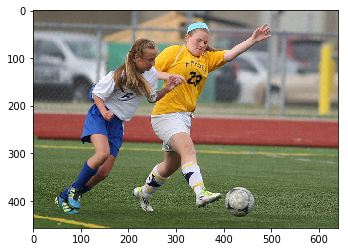

In [70]:
print(image_id)
print(caption)
show_img(image_id)

In [71]:
# for round in range(len(dialog)):
for round in range(round_index):
    print("Q{}".format(round+1) , questions[dialog[round]['question']])
    print("A{}".format(round+1) , answers[dialog[round]['answer']])
    print("\n")


Q1 how old are the girls
A1 teens


Q2 is there anything in the image besides the girls
A2 yes, some cars


Q3 what color are their shirts
A3 1 is yellow, 1 is white


Q4 what color are their shorts
A4 blue on one, white on 1


Q5 can you see the street
A5 no


Q6 is there a parking lot
A6 yes


Q7 is there a fence
A7 yes




In [43]:
list_ans_opts = 5

for ans_opt in range(list_ans_opts):
    print(answers[dialog[round]['answer_options'][ans_opt]])

yes
2
blue
nope
3


In [44]:
dialog

[{'answer': 12479,
  'gt_index': 32,
  'question': 41900,
  'answer_options': [12517,
   33795,
   1309,
   101,
   26646,
   13674,
   9030,
   13450,
   22950,
   6200,
   13846,
   8537,
   10067,
   8795,
   17014,
   25917,
   15852,
   14002,
   12334,
   34461,
   17773,
   1352,
   14299,
   16807,
   20371,
   1996,
   1500,
   32979,
   309,
   30342,
   24610,
   13476,
   12479,
   615,
   305,
   14924,
   29570,
   10745,
   32064,
   32641,
   32253,
   10995,
   29169,
   8268,
   28564,
   19211,
   11694,
   16008,
   8344,
   27806,
   15736,
   4754,
   24288,
   9421,
   6477,
   13691,
   32886,
   3566,
   22156,
   11091,
   15180,
   33757,
   24076,
   8467,
   30844,
   8627,
   4315,
   25843,
   14289,
   4955,
   28855,
   14843,
   32171,
   79,
   10292,
   7847,
   19932,
   4307,
   11483,
   6121,
   33403,
   20812,
   13982,
   18304,
   5876,
   25254,
   23576,
   23088,
   28724,
   15221,
   4886,
   32559,
   28231,
   3466,
   20424,
   24023,

In [45]:
## WIP

annotations_json = json.load(open(dense_annotations_jsonpath))

def convert_list_json_dic(ranks_json):
    image_ranks_dic = {}
    for i in range(len(ranks_json)):
        image_ranks_dic[ranks_json[i]["image_id"]] = ranks_json[i]
    return image_ranks_dic

annotations_json = convert_list_json_dic(annotations_json)

dense_annotations = annotations_json[image_id]
# print(dense_annotations.keys())
gt_round_id = dense_annotations["round_id"]  # Already 1-index
gt_image_id = dense_annotations["image_id"]
gt_relevance = dense_annotations["gt_relevance"]

print("Length of gt relevance:", len(gt_relevance))
print(dense_annotations)

gt_index 

Length of gt relevance: 100
{'image_id': 304354, 'round_id': 10, 'gt_relevance': [0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.2, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]}


80

In [46]:
gt_index = dialog[gt_round_id-1]['gt_index']
print(gt_index)
print(gt_relevance[gt_index])
print(answers[dialog[gt_round_id-1]['answer_options'][gt_index]])

one_score_index = gt_relevance.index(1)
print(one_score_index)
print(answers[dialog[gt_round_id-1]['answer_options'][one_score_index]])

64
0.4
it's a marble color, white and brown


ValueError: 1 is not in list

In [24]:
annotations_json

{185565: {'image_id': 185565,
  'round_id': 8,
  'gt_relevance': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.2,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.4,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.8,
   0.2,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.8,
   0.0,
   0.2,
   0.0,
   0.0,
   0.2,
   0.4,
   0.4,
   0.0,
   0.0,
   0.0,
   0.2,
   0.0,
   0.0,
   0.0,
   0.4,
   0.0,
   0.0,
   0.0,
   0.0,
   0.2,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.4,
   0.4,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.6,
   0.0,
   0.0,
   0.2,
   0.4,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.2,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0]},
 284024: {'image_id': 284024,
  'round_id': 3,
  'gt_relevance': [0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
   0.0,
